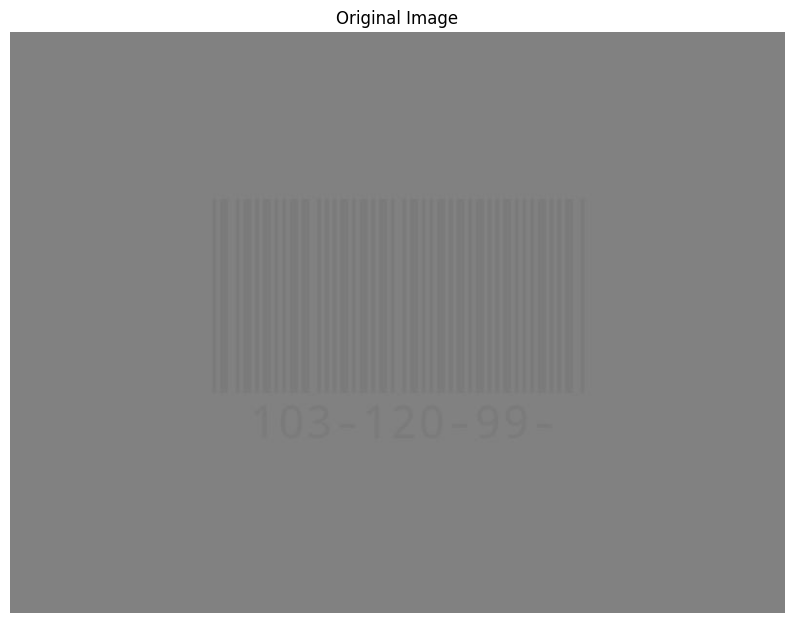

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('D://Ahmed//Computer Vision//barcode_vision//Test Cases Code//10 - wen el kontraastttt.jpg')
#show image
def show_image(title, image):
    plt.figure(figsize=(10, 10))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

show_image('Original Image', image)



In [ ]:
def crop_barcode(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image from {image_path}")
        return
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Apply edge detection
    edged = cv2.Canny(blurred, 50, 200, 255)
    
    # Apply morphological operations to close gaps in the edges
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    
    # Show the edged image
    show_image("Edged Image", edged)
    show_image("Closed Image", closed)
    
    # Find contours in the closed image
    contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Sort the contours by area, keeping only the largest one
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    
    barcode_contour = None
    
    # Loop over the contours to find the one that likely represents the barcode
    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * peri, True)
        
        # If the approximated contour has four points, we can assume we have found the barcode
        if len(approx) == 4:
            barcode_contour = approx
            break
    
    if barcode_contour is not None:
        # Draw the contour on the image
        cv2.drawContours(image, [barcode_contour], -1, (0, 255, 0), 2)
        show_image("Detected Barcode", image)
        
        # Get the bounding box of the barcode contour
        x, y, w, h = cv2.boundingRect(barcode_contour)
        
        # Crop the image to the bounding box
        cropped_image = image[y:y+h, x:x+w]
        
        # Save the cropped image
        cv2.imwrite(output_path, cropped_image)
        print(f"Cropped image saved to {output_path}")
    else:
        print("No barcode detected")